The original 3D version of the model looks like this: 

dV/dt = gv * I - gvh * H * V - (av1 * V)/(1+av2 * V) - alphav * V 

dH/dt = bhd * D * H * ((H-eps)/(H+eps)) - ghv * H * V

dI/dt = ghv * H * V - ai * I

where D = 1-H-I and represents the fraction of epithelial cells that are dead.

The model below is the reduced 3d-to-2d version of the model.  In this version, we take the original 3d equations, set dI/dt=0, and solve for I, to get I = (Gv * Ghv/ai).  We substitute this into the dH/dt and dV/dt equations and use this reduced form to study the behavior of H and V.  The code below runs and plots the output for the 3to2 model.

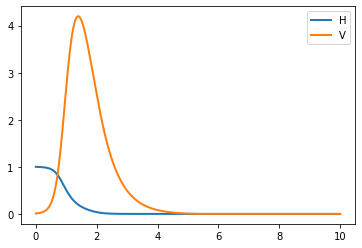

In [10]:
from ipywidgets import *
import tellurium as te
import matplotlib.pyplot as plt
import numpy as np

antStr = '''
model Reduced3to2model()
    # Parameters (these are all constant):
    Gv=20; Gvh=0.7; alphav=1.7; av1=1400; av2=77628; Ghv=0.7;
    Bhd=4; ai=1.5; ep=0.05; bFH=17; bF=125; aF=8; aR=1;
    
    # Equations (the letter after the arrow defines the variable, and the eqn after the semicolon defines the right hand side of the ODE):
    -> V; ((Gv*Ghv/ai)-Gvh)*H*V-alphav*V-((av1*V)/(1+av2*V));
    -> H; Bhd*(1-(Ghv*H*V/ai)-H)*H*((H-ep)/(H+ep))-Ghv*H*V;
   
    # Initial Conditions (the initial levels of each variable):
    V = 0.01; H = 1;

end'''

antStrEdit = '''
model Reduced3to2model()
    # Parameterss (these are all constant):
    Gv=20; Gvh=0.7; alphav=1.7; av1=28; av2=1550; Ghv=0.7;
    Bhd=4; ai=1.5; ep=0.1; bFH=17; bF=125; aF=8; aR=1;
    delf=.5; cfi=2; kvf=5; kif=3; tauf=2;
    kfh=.3; khf=.3; kff=1.2; b2=1;
    
    
    
    # Equations (the letter after the arrow defines the variable, and the eqn after the semicolon defines the right hand side of the ODE):
    -> D; 1-H-I
    -> V; ((Gv*Ghv/ai)-Gvh)*H*V-alphav*V-((av1*V)/(1+av2*V));
    -> H; Bhd*(1-(Ghv*H*V/ai)-H)*H*((H-ep)/(H+ep))-Ghv*H*V;
    -> I; Ghv*H*V/(1+kif*F) - ai*I
    -> F; (cfi*I-delf*F+kfh*D*F+kff*F^2/(1+b2*F^2))/tauf
    
   
    # Initial Conditions (the initial levels of each variable):
    V = 0.01; H = 1;

end
'''
rr = te.loadAntimonyModel(antStrEdit)

rr.simulate(0,10,1000,['Time','H','V']) #simulates the model from time t=0 to t=10 with 1000 steps in between
rr.plot()


The code below then takes the model defined above and allows you to experiment with changing V0 (the initial level of virus present in the host) and Gv (gamma_v, the replication rate of the virus).  You can use the sliders to change one or both of these parameters and see what happens.

In [11]:
def replot(V0,Gv):
    rr.resetAll()
    rr.V=V0
    rr.Gv=Gv
    m = rr.simulate(0, 10,1000)
    rr.plot()
    
Gv=widgets.FloatLogSlider(description="Gv",value=20,min=-1.0, max=3.0)
V0=widgets.FloatLogSlider(description="V0",value=0.01,min=-3.0, max=2.0)
ui=widgets.HBox([V0,Gv])
out=widgets.interactive_output(replot,{'V0':V0, 'Gv':Gv})
display(ui,out)

Output()

The original 5D system looks like this:

dV/dt = gv * I - gvh * H * V - (av1 * V)/(1+av2 * V) - alphav * V 

dH/dt = bhd * D * H * ((H-eps)/(H+eps)) - ghv * H * V + aR * R - bHF * F * H

dI/dt = ghv * H * V - ai * I

dF/dt = bF * I - bFH * F * H - aF * F

dR/dt = bFH * F * H - aR * R

This model adds type I interferon (F) and resistant epithelial cells (R) to the system.  Resistant cells cannot become infected, so this reduces the pool of cells which the virus can infect, helping to limit the infection. 

Similar to the 3D system above, we created a reduced version of the original 5D model,  As before, we set dI/dt=0, and also dR/dt=0 and dF/dt = 0, and solve  for I, R, and F.  The equations in the model below represent this reduced system.

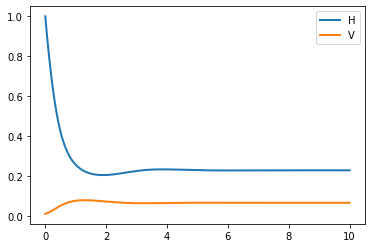

In [12]:
from ipywidgets import *
import tellurium as te
import matplotlib.pyplot as plt
import numpy as np

antStr = '''
model Reduced5to2model()
    # Parameters:
    Gv=20; Gvh=0.7; alphav=1.7; av1=28; av2=1550; Ghv=0.7;
    Bhd=4; ai=1.5; ep=0.05; bFH=17; bF=125; aF=8; aR=1;
    
    # Equations:
    -> V; (Gv/ai-1)*Gvh*H*V-alphav*V-(av1*V)/(1+av2*V);
    -> H; Bhd*(1-(Gvh*H*V/ai)-H-(bFH/aR)*((bF*Gvh*H*H*V)/(ai*(bFH*H+aF))))*H*((H-ep)/(H+ep))-Gvh*H*V+(1-bFH)*((bF*Gvh*H*H*V)/(ai*(bFH*H+aF)));
   
    # Initial Conditions:
    V = 0.01; H = 1;

end'''
rr = te.loadAntimonyModel(antStr)

rr.simulate(0,10,1000,['Time','H','V'])
rr.plot()

Again, you can use the sliders to play around with V0 and Gv in this system.

In [13]:
def replot(V0,Gv):
    rr.resetAll()
    rr.V=V0
    rr.Gv=Gv
    m = rr.simulate(0, 10,1000)
    rr.plot()

Gv=widgets.FloatLogSlider(description="Gv",value=20,min=-1.0, max=3.0)
V0=widgets.FloatLogSlider(description="V0",value=0.01,min=-3.0, max=2.0)
ui=widgets.HBox([V0,Gv])
out=widgets.interactive_output(replot,{'V0':V0, 'Gv':Gv})
display(ui,out)

Output()